## Project overall

Hi Ingvild and Stefan! Unfortunately I am in a meeting during the first part group session, but I suggest that you spend this time 
1) getting to know the platform and 
2) checking the ebas data (see below) 
3) Check the cloud properties data from Zeppelin (see end of this document) 

This is all about evaluating how models represent variability and co-variability. Ultimately this will tell us something about how different processes influences the available CCN in the Arctic. If we for example consider the relationship between sulphate and N100 in the model is completely different from in nature, this tells us that the model is doing something wrong. On the other hand, if the model does the right relationship but the wrong total concentration, this might tell us that loss processes or emissions are wrong. Overall, it is a way of evaluating the performance of the model and to what extent it gets the effect of different emissions right. 


Questions we could ask: 

- How do sulphate concentrations relate to number of aerosols e.g. larger than 50, 100 and 200? Does the relationship stay constant through the year? 
- Can we evaluate sea salt in the model? Does it impact the correct sizes of particles?
- Is there an interplay between the sulphate and the sea salt? 
- New particle formation is a process contributing very many small particles. Can we see any interplay between e.g. seas salt aerosol? 

## To find your data

Use the ebas web page: https://ebas-data.nilu.no/
Find the name and info for your data

In [2]:
# You need to first install threddsclient:
!pip install threddsclient
import threddsclient
import xarray as xr


  Using cached threddsclient-0.4.2-py3-none-any.whl


### Find some data to search for
In this case I found that I want station NO0042G, which is Zeppelin mountain and the variable name is sulphate_total:

In [3]:
# Find url addresses for files on EBAS

all_opendap_urls = threddsclient.opendap_urls(
'https://thredds.nilu.no/thredds/catalog/ebas/catalog.xml')

# get all data urls for one station, e.g., Zeppelin NO0042G
opendap_urls = [x for x in all_opendap_urls if 'NO0042G' in x]
# get all scattering data urls
opendap_urls = [x for x in opendap_urls if 'sulphate_total' in x]

opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.19891101070000.20210420142507.filter_3pack.sulphate_total.aerosol.3y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc']

### Open the file: 

In [4]:
# read multiple files
# the problem with this example is, that the files are from different instruments

dsmf = xr.open_mfdataset(opendap_urls)
dsmf

<xarray.Dataset>
Dimensions:                                  (time: 1157, tbnds: 2,
                                              metadata_time: 4,
                                              sulphate_total_ug_S_per_m3_qc_flags: 1,
                                              sulphate_total_ug_per_m3_qc_flags: 1)
Coordinates:
  * time                                     (time) datetime64[ns] 1989-11-01...
  * metadata_time                            (metadata_time) datetime64[ns] 1...
Dimensions without coordinates: tbnds, sulphate_total_ug_S_per_m3_qc_flags,
                                sulphate_total_ug_per_m3_qc_flags
Data variables:
    time_bnds                                (time, tbnds) datetime64[ns] dask.array<chunksize=(1157, 2), meta=np.ndarray>
    metadata_time_bnds                       (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(4, 2), meta=np.ndarray>
    sulphate_total_ug_per_m3_ebasmetadata    (metadata_time) |S64 dask.array<chunksize=(4,), meta=np.ndarray>
    sulphate_total_ug_S_per_m3               (time) float64 dask.array<chunksize=(1157,), meta=np.ndarray>
    sulphate_total_ug_S_per_m3_qc            (sulphate_total_ug_S_per_m3_qc_flags, time) float64 dask.array<chunksize=(1, 1157), meta=np.ndarray>
    sulphate_total_ug_S_per_m3_ebasmetadata  (metadata_time) |S64 dask.array<chunksize=(4,), meta=np.ndarray>
    sulphate_total_ug_per_m3_qc              (sulphate_total_ug_per_m3_qc_flags, time) float64 dask.array<chunksize=(1, 1157), meta=np.ndarray>
    sulphate_total_ug_per_m3                 (time) float64 dask.array<chunksize=(1157,), meta=np.ndarray>
Attributes: (12/93)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Ground based in situ observations of s...
    keywords:                          NO0042G, Zeppelin mountain (Ny-Ålesund...
    id:                                NO0042G.19891101070000.20210420142507....
    naming_authority:                  EBAS
    ...                                ...
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    comment:                           {\n    "Data definition": "EBAS_1.1", ...
    standard_name_vocabulary:          CF-1.7, ACDD-1.3
    history:                           None
    creator_url:                       ebas.nilu.no

In [5]:
# read multiple files
# the problem with this example is, that the files are from different instruments

dsmf = xr.open_mfdataset(opendap_urls)
dsmf

<xarray.Dataset>
Dimensions:                                  (time: 1157, tbnds: 2,
                                              metadata_time: 4,
                                              sulphate_total_ug_S_per_m3_qc_flags: 1,
                                              sulphate_total_ug_per_m3_qc_flags: 1)
Coordinates:
  * time                                     (time) datetime64[ns] 1989-11-01...
  * metadata_time                            (metadata_time) datetime64[ns] 1...
Dimensions without coordinates: tbnds, sulphate_total_ug_S_per_m3_qc_flags,
                                sulphate_total_ug_per_m3_qc_flags
Data variables:
    time_bnds                                (time, tbnds) datetime64[ns] dask.array<chunksize=(1157, 2), meta=np.ndarray>
    metadata_time_bnds                       (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(4, 2), meta=np.ndarray>
    sulphate_total_ug_per_m3_ebasmetadata    (metadata_time) |S64 dask.array<chunksize=(4,), meta=np.ndarray>
    sulphate_total_ug_S_per_m3               (time) float64 dask.array<chunksize=(1157,), meta=np.ndarray>
    sulphate_total_ug_S_per_m3_qc            (sulphate_total_ug_S_per_m3_qc_flags, time) float64 dask.array<chunksize=(1, 1157), meta=np.ndarray>
    sulphate_total_ug_S_per_m3_ebasmetadata  (metadata_time) |S64 dask.array<chunksize=(4,), meta=np.ndarray>
    sulphate_total_ug_per_m3_qc              (sulphate_total_ug_per_m3_qc_flags, time) float64 dask.array<chunksize=(1, 1157), meta=np.ndarray>
    sulphate_total_ug_per_m3                 (time) float64 dask.array<chunksize=(1157,), meta=np.ndarray>
Attributes: (12/93)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Ground based in situ observations of s...
    keywords:                          NO0042G, Zeppelin mountain (Ny-Ålesund...
    id:                                NO0042G.19891101070000.20210420142507....
    naming_authority:                  EBAS
    ...                                ...
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    comment:                           {\n    "Data definition": "EBAS_1.1", ...
    standard_name_vocabulary:          CF-1.7, ACDD-1.3
    history:                           None
    creator_url:                       ebas.nilu.no

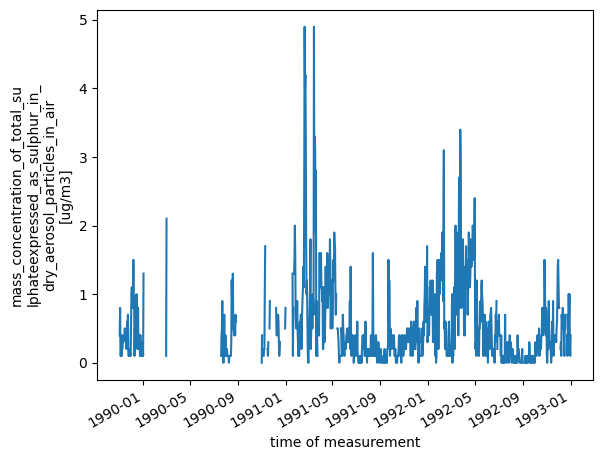

In [6]:
dsmf['sulphate_total_ug_per_m3'].plot()

In [ ]:
particle_number_size_distribution.aerosol.6y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc'.aerosol.6y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc'

In [11]:
# Find url addresses for files on EBAS

all_opendap_urls = threddsclient.opendap_urls(
'https://thredds.nilu.no/thredds/catalog/ebas/catalog.xml')

# get all data urls for one station, e.g., Zeppelin NO0042G
opendap_urls = [x for x in all_opendap_urls if 'NO0042G' in x]
# get all scattering data urls
opendap_urls = [x for x in opendap_urls if 'particle_number_size_distribution' in x]
opendap_urls = [x for x in opendap_urls if 'lev2' in x]

opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.3y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.1y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20060101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.2y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20000301000000.20170523103005.dmps.particle_number_size_distribution.aerosol.6y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc']

In [14]:
# read multiple files
# the problem with this example is, that the files are from different instruments

dsmf = xr.open_mfdataset(opendap_urls[:1])
dsmf

<xarray.Dataset>
Dimensions:                                         (time: 26280, tbnds: 2,
                                                     metadata_time: 3, D: 20,
                                                     particle_number_size_distribution_qc_flags: 2)
Coordinates:
  * time                                            (time) datetime64[ns] 200...
  * metadata_time                                   (metadata_time) datetime64[ns] ...
  * D                                               (D) float64 10.0 ... 794.3
Dimensions without coordinates: tbnds,
                                particle_number_size_distribution_qc_flags
Data variables:
    time_bnds                                       (time, tbnds) datetime64[ns] dask.array<chunksize=(26280, 2), meta=np.ndarray>
    metadata_time_bnds                              (metadata_time, tbnds) datetime64[ns] dask.array<chunksize=(3, 2), meta=np.ndarray>
    particle_number_size_distribution_ebasmetadata  (D, metadata_time) |S64 dask.array<chunksize=(20, 3), meta=np.ndarray>
    particle_number_size_distribution_qc            (D, particle_number_size_distribution_qc_flags, time) float64 dask.array<chunksize=(20, 2, 26280), meta=np.ndarray>
    particle_number_size_distribution               (D, time) float64 dask.array<chunksize=(20, 26280), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      NO0042G, Zeppelin mountain (Ny-Ålesund), p...
    id:                            NO0042G.20080101000000.20181205100800.dmps...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

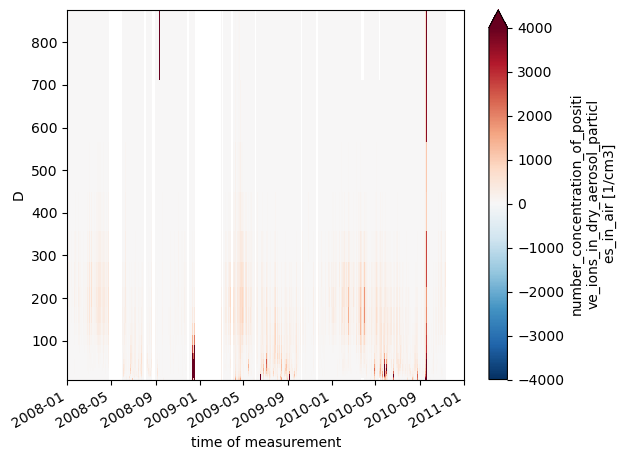

In [18]:
dsmf['particle_number_size_distribution'].plot(vmax=4e3)

In [ ]:
dsmf['particle_number_size_distribution']..plot(vmax=4e3)

## Check if you can download and plot the cloud data from zeppelin!

- Particle and cloud properties from Zeppelin Observatory (https://bolin.su.se/data/zeppelin-cloud-aerosol-1 )
